In [67]:
import numpy as np 
import torch 
import garch_framework as frame
from garch_framework.layers.losses import CorrectedNLoss
from garch_framework.utils.helpers import generate_ground_data, save_model_params, fit_figarch_parameters,compute_omega, compute_lambda_sequence
from garch_framework.utils.datasets import FIGARCHDataset
from garch_framework.models import FIGARCHModel
import matplotlib.pyplot as plt 
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
from torch.utils.data import Dataset
from arch import arch_model

In [68]:
# omega > 0 <- 1
# 0 <= d <= 1 <- 2
# 0 <= phi <= (1 - d) / 2 <- 2
# 0 <= beta <= d + phi <- 2

omega, d, phi, beta = 0.1, 0.5, 0.2, 0.3
truncation_size = 32

In [69]:
grounds = [omega, d, phi, beta]

In [70]:
data, volat = generate_ground_data(mode = 'FIGARCH',omega=omega, d=d, phi = phi,beta=beta, n=10000)

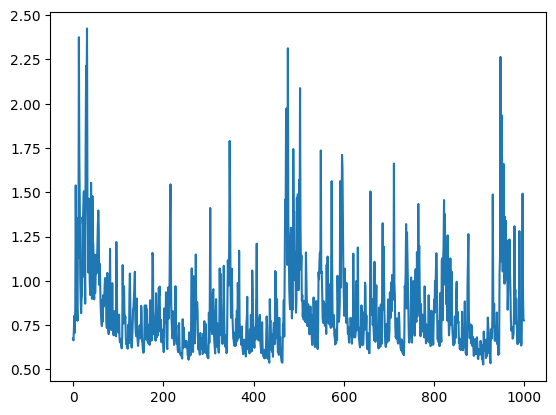

In [71]:
plt.plot(volat[:1000])

In [72]:
np.square(data[10])

3.3457896011036143

In [73]:
np.square(volat[10])

0.5995055615982412

In [74]:
dataset= FIGARCHDataset(data, volat, truncation_size=truncation_size, scale = 100)

In [75]:
for i in range(3):
    print(dataset[i])

(tensor([1.8896e+00, 3.0606e+01, 5.1316e+01, 9.0092e+00, 7.4755e+01, 4.7249e+02,
        9.3911e+01, 1.7956e+02, 1.9402e-01, 1.5424e+01, 3.3458e+02, 1.1981e+02,
        1.2391e+03, 2.7656e+02, 2.0151e+02, 1.7483e-01, 4.3060e+00, 8.0073e-01,
        5.0655e+01, 5.4091e+01, 3.0896e+02, 2.2247e+02, 2.7995e+02, 3.3606e+02,
        8.2108e+00, 1.3605e+02, 2.1981e-01, 6.2016e+02, 9.2748e+02, 6.1189e+02,
        1.0674e+03, 5.7970e+00]), tensor(210.5832))
(tensor([3.0606e+01, 5.1316e+01, 9.0092e+00, 7.4755e+01, 4.7249e+02, 9.3911e+01,
        1.7956e+02, 1.9402e-01, 1.5424e+01, 3.3458e+02, 1.1981e+02, 1.2391e+03,
        2.7656e+02, 2.0151e+02, 1.7483e-01, 4.3060e+00, 8.0073e-01, 5.0655e+01,
        5.4091e+01, 3.0896e+02, 2.2247e+02, 2.7995e+02, 3.3606e+02, 8.2108e+00,
        1.3605e+02, 2.1981e-01, 6.2016e+02, 9.2748e+02, 6.1189e+02, 1.0674e+03,
        5.7970e+00, 1.1766e+02]), tensor(170.3756))
(tensor([5.1316e+01, 9.0092e+00, 7.4755e+01, 4.7249e+02, 9.3911e+01, 1.7956e+02,
        1.940

In [76]:
len(dataset[0][0])

32

In [77]:
model = FIGARCHModel(truncation_size)
criterion = CorrectedNLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [78]:
dl = DataLoader(dataset, batch_size=128, shuffle=False, drop_last=False)

In [79]:
num_epochs = 100

for epochs in tqdm(range(num_epochs), desc="Training"):
    epoch_loss =0.0
    model.train()

    for inputs, resids in dl:
        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output, resids)
        loss.backward()
        optimizer.step()
        
        epoch_loss+=loss.item()

    avg_loss = epoch_loss/len(dl)
    

    
    tqdm.write(f"Epoch {epochs+1}/{num_epochs} | Loss: {avg_loss:.4f} | LR: {optimizer.param_groups[0]['lr']:.2e}")


Training:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100 | Loss: 3.8705 | LR: 1.00e-03
Epoch 2/100 | Loss: 3.8286 | LR: 1.00e-03
Epoch 3/100 | Loss: 3.7807 | LR: 1.00e-03
Epoch 4/100 | Loss: 3.7251 | LR: 1.00e-03
Epoch 5/100 | Loss: 3.6586 | LR: 1.00e-03
Epoch 6/100 | Loss: 3.5759 | LR: 1.00e-03
Epoch 7/100 | Loss: 3.4667 | LR: 1.00e-03
Epoch 8/100 | Loss: 3.3049 | LR: 1.00e-03
Epoch 9/100 | Loss: 2.9899 | LR: 1.00e-03
Epoch 10/100 | Loss: 2.6624 | LR: 1.00e-03
Epoch 11/100 | Loss: 2.6506 | LR: 1.00e-03
Epoch 12/100 | Loss: 2.6488 | LR: 1.00e-03
Epoch 13/100 | Loss: 2.6481 | LR: 1.00e-03
Epoch 14/100 | Loss: 2.6479 | LR: 1.00e-03
Epoch 15/100 | Loss: 2.6477 | LR: 1.00e-03
Epoch 16/100 | Loss: 2.6477 | LR: 1.00e-03
Epoch 17/100 | Loss: 2.6476 | LR: 1.00e-03
Epoch 18/100 | Loss: 2.6476 | LR: 1.00e-03
Epoch 19/100 | Loss: 2.6476 | LR: 1.00e-03
Epoch 20/100 | Loss: 2.6476 | LR: 1.00e-03
Epoch 21/100 | Loss: 2.6476 | LR: 1.00e-03
Epoch 22/100 | Loss: 2.6476 | LR: 1.00e-03
Epoch 23/100 | Loss: 2.6476 | LR: 1.00e-03
Epoch 24/100 | Loss:

In [80]:
model_params = model.get_params()[::-1]

In [81]:
model_params 

array([0.4267296 , 0.12276938, 0.05761737, 0.03807025, 0.02937535,
       0.02778228, 0.02540914, 0.02339732, 0.02129593, 0.01919602,
       0.02077483, 0.01748895, 0.01772801, 0.0183129 , 0.0188574 ,
       0.01750889, 0.01596291, 0.01686831, 0.01628808, 0.01770291,
       0.01595795, 0.01581919, 0.01634924, 0.01540988, 0.01633895,
       0.01576581, 0.01506992, 0.01683222, 0.01651991, 0.0165874 ,
       0.01493253, 0.01950446], dtype=float32)

In [82]:
compute_lambda_sequence(d, phi, beta, truncation_size)

array([0.4       , 0.145     , 0.081     , 0.0508625 , 0.03479   ,
       0.02547606, 0.01965454, 0.01576575, 0.01302135, 0.01099793,
       0.00945363, 0.00824213, 0.00727031, 0.00647628, 0.00581741,
       0.00526343, 0.0047923 , 0.00438762, 0.00403693, 0.00373066,
       0.00346129, 0.00322288, 0.00301065, 0.00282076, 0.00265004,
       0.00249588, 0.00235612, 0.00222894, 0.00211281, 0.00200643,
       0.00190869])

In [ ]:
fit_figarch_parameters(model_params[:3]) #С параметрами все ок - а вот МНК при оценке явно не работает

(1.000000000001e-06, 0.496540672393628, 1.0000000289561853e-06)